### Countour plot example

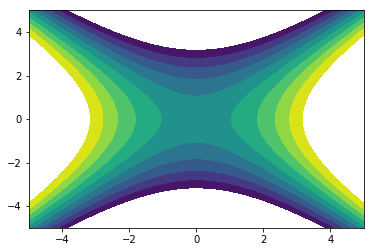

In [1]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()

x = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, x)
Z = X**2 - Y**2

levels = np.linspace(-10, 10, 10)
cs = plt.contourf(X, Y, Z, levels = levels)
#plt.colorbar(cs, ax=fig, format="%.2f")

plt.show()

### Load dataset

In [2]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


from sklearn.datasets import load_breast_cancer
dataf = load_breast_cancer()
data = dataf.data.tolist()
target = dataf.target.tolist()
from sklearn.preprocessing import StandardScaler
data_std = StandardScaler().fit_transform(data)

# reduce dimension to 2

from sklearn.decomposition import PCA

X = PCA(n_components = 2).fit_transform(data_std)
Y = target


### Logistic Regression decision boundary

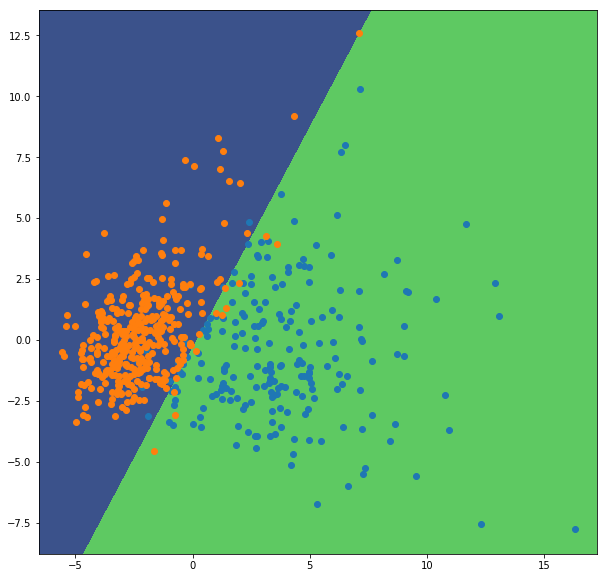

In [3]:
h = 0.1 #step size in mesh
from sklearn.linear_model import LogisticRegression 
logreg = LogisticRegression()

clf = logreg.fit(X, Y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

fig = plt.figure(figsize = (10,10))
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,0]
levels = np.linspace(0, 1, 10)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, levels = [0,0.5,1])
#plt.axis('off')

# Plot also the training points

frame = pd.DataFrame({"x1": X[:,0], "x2": X[:,1], "label": Y})
frame_0 = frame[frame["label"]==0]
frame_1 = frame[frame["label"]==1]

X1,X2 = frame_0["x1"], frame_0["x2"]
plt.scatter(X1,X2)
X1,X2 = frame_1["x1"], frame_1["x2"]
plt.scatter(X1,X2)

#plt.set_title('Logistic Regression')
plt.show()

### SVM decision boundary

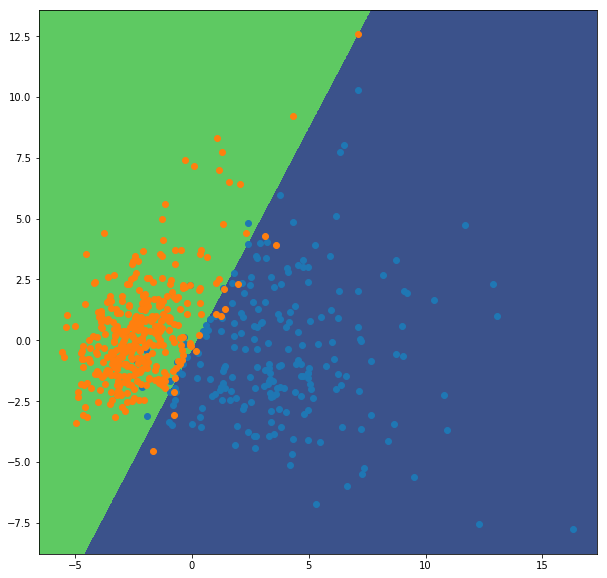

In [4]:
h = 0.01  # step size in the mesh
from sklearn.svm import LinearSVC
SVM = LinearSVC(C = 1)
clf = SVM.fit(X, Y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


fig = plt.figure(figsize = (10,10))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

levels = np.linspace(0, 1, 10)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, levels = [0,0.5,1])
#plt.axis('off')

# Plot also the training points

frame = pd.DataFrame({"x1": X[:,0], "x2": X[:,1], "label": Y})
frame_0 = frame[frame["label"]==0]
frame_1 = frame[frame["label"]==1]

X1,X2 = frame_0["x1"], frame_0["x2"]
plt.scatter(X1,X2)
X1,X2 = frame_1["x1"], frame_1["x2"]
plt.scatter(X1,X2)

#plt.set_title('Logistic Regression')
plt.show()

### Polynomial  Kernel SVM decision boundary

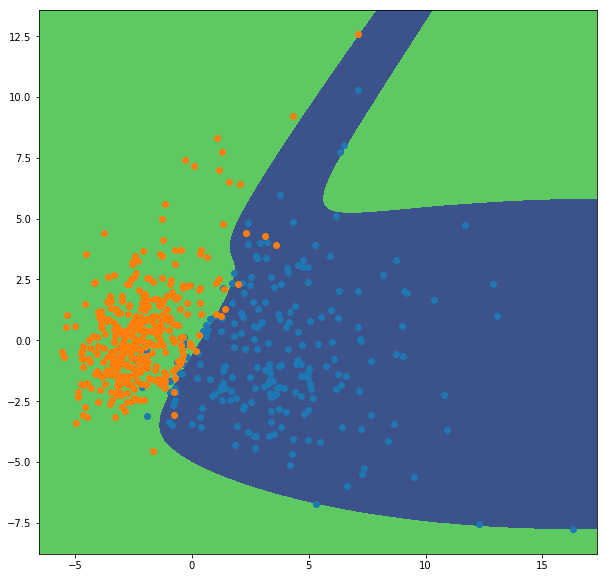

In [5]:

h = 0.01  # step size in the mesh
from sklearn.svm import SVC
SVM = SVC(kernel = "poly", degree = 4, C = 1, coef0 = 1)
clf = SVM.fit(X, Y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


fig = plt.figure(figsize = (10,10))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, levels = [0,0.5,1])
#plt.axis('off')

# Plot also the training points

frame = pd.DataFrame({"x1": X[:,0], "x2": X[:,1], "label": Y})
frame_0 = frame[frame["label"]==0]
frame_1 = frame[frame["label"]==1]

X1,X2 = frame_0["x1"], frame_0["x2"]
plt.scatter(X1,X2)
X1,X2 = frame_1["x1"], frame_1["x2"]
plt.scatter(X1,X2)

#plt.set_title('Logistic Regression')
plt.show()

### RBF kernel SVM decision boundary

[0 0 0 ..., 0 0 0]


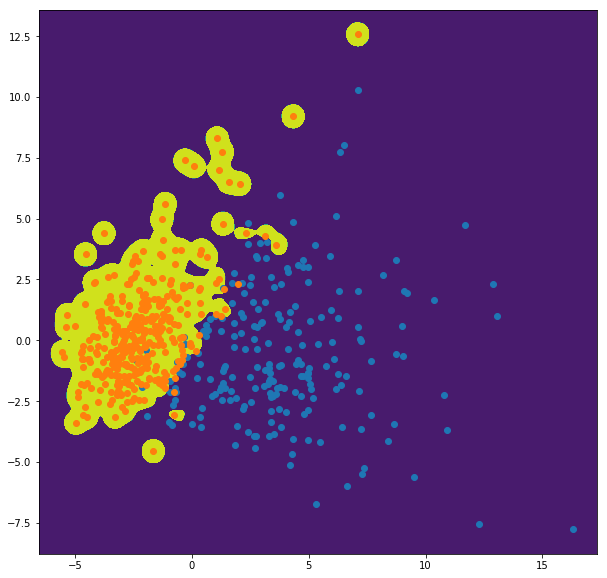

In [6]:
h = 0.01  # step size in the mesh

from sklearn.svm import SVC
SVM = SVC(kernel = "rbf", gamma = 10, C = 1)
clf = SVM.fit(X, Y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

fig = plt.figure(figsize = (10,10))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
print(Z)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z)
#plt.axis('off')

# Plot also the training points

frame = pd.DataFrame({"x1": X[:,0], "x2": X[:,1], "label": Y})
frame_0 = frame[frame["label"]==0]
frame_1 = frame[frame["label"]==1]

X1,X2 = frame_0["x1"], frame_0["x2"]
plt.scatter(X1,X2)
X1,X2 = frame_1["x1"], frame_1["x2"]
plt.scatter(X1,X2)

plt.show()